In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

# Display the first few rows of the DataFrame
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Inspect the data

Check for missing values, data types, and summary statistics.


In [2]:
# Display data types of each column
print("Data Types:")
display(df.info())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(df.describe())

# Display summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
display(df.describe(include='object'))

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non

None


Missing Values:


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0



Summary Statistics for Numerical Columns:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000



Summary Statistics for Categorical Columns:


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


## Handle missing values




In [3]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Check for missing values after dropping rows
print("\nMissing Values after dropping rows:")
display(df.isnull().sum())


Missing Values after dropping rows:


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


## Address data types

Convert columns to appropriate data types if necessary.


In [4]:
from sklearn.preprocessing import LabelEncoder
#Binary categorical features
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities', 'School_Type', 'Gender']

# Apply Label Encoding to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the DataFrame with encoded columns
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,1,Positive,3,0,High School,Near,1,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,1,Negative,4,0,College,Moderate,0,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,1,Neutral,4,0,Postgraduate,Near,1,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,1,Negative,4,0,High School,Moderate,1,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,1,Neutral,4,0,College,Near,0,70


# this col if done by normal label encode may affect the regression soo either doing Ordinal Encoding or controlled labed Encode
i prefer lable encode  

[Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Peer_Influence]

In [5]:
columns_to_check = ['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality','Parental_Education_Level','Distance_from_Home','Peer_Influence']

for col in columns_to_check:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Parental_Involvement': ['Low' 'Medium' 'High']
Unique values in 'Access_to_Resources': ['High' 'Medium' 'Low']
Unique values in 'Motivation_Level': ['Low' 'Medium' 'High']
Unique values in 'Family_Income': ['Low' 'Medium' 'High']
Unique values in 'Teacher_Quality': ['Medium' 'High' 'Low']
Unique values in 'Parental_Education_Level': ['High School' 'College' 'Postgraduate']
Unique values in 'Distance_from_Home': ['Near' 'Moderate' 'Far']
Unique values in 'Peer_Influence': ['Positive' 'Negative' 'Neutral']


In [6]:
# Define the mapping for label encoding based on the specified order (higher is better)
label_mapping = {
    'Parental_Involvement': {
        'Low': 0,
        'Medium': 1,
        'High': 2
    },
    'Access_to_Resources': {
        'Low': 0,
        'Medium': 1,
        'High': 2
    },
    'Motivation_Level': {
        'Low': 0,
        'Medium': 1,
        'High': 2
    },
    'Family_Income': {
        'Low': 0,
        'Medium': 1,
        'High': 2
    },
    'Teacher_Quality': {
        'Low': 0,
        'Medium': 1,
        'High': 2
    },
    'Parental_Education_Level': {
        'High School': 0,
        'College': 1,
        'Postgraduate': 2
    },
    'Distance_from_Home': {
        'Far': 0,         # Further distance is less ideal
        'Moderate': 1,
        'Near': 2
    },
    'Peer_Influence': {
        'Negative': 0,
        'Neutral': 1,
        'Positive': 2
    }
}

# Apply the label encoding using the map function
for col, mapping in label_mapping.items():
    df[col] = df[col].map(mapping)

# Display the first few rows of the DataFrame with encoded columns
display(df.head())

# Check for missing values after applying the mapping to ensure all values were mapped
print("\nMissing Values after applying mapping:")
display(df.isnull().sum())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,2,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,2,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,2,0,70



Missing Values after applying mapping:


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


## some visualization for the data

Scatter Plots of Numerical Features vs Exam Score:


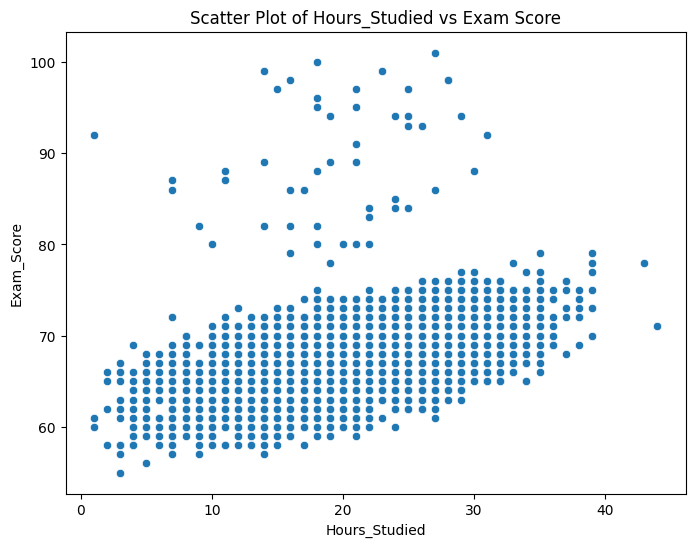

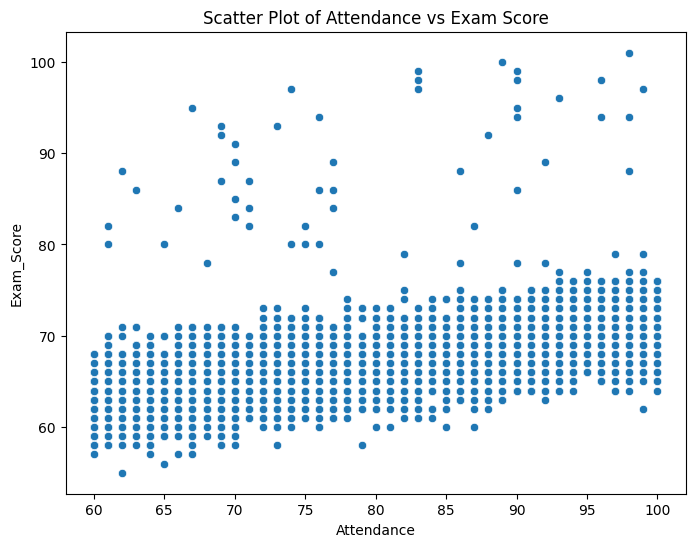

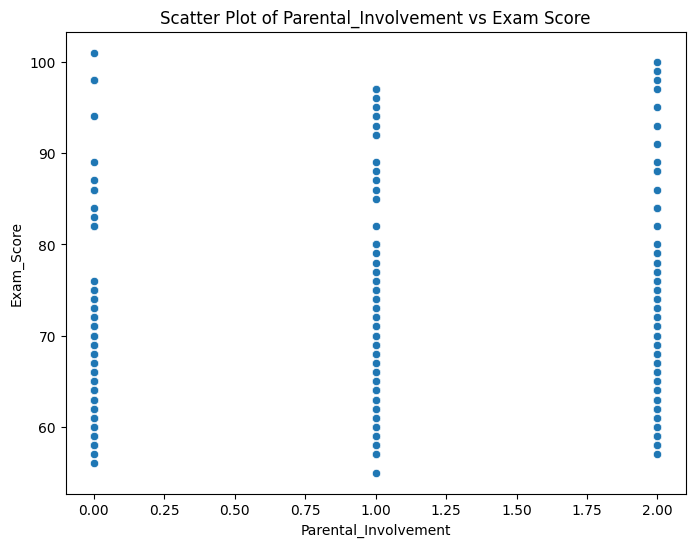

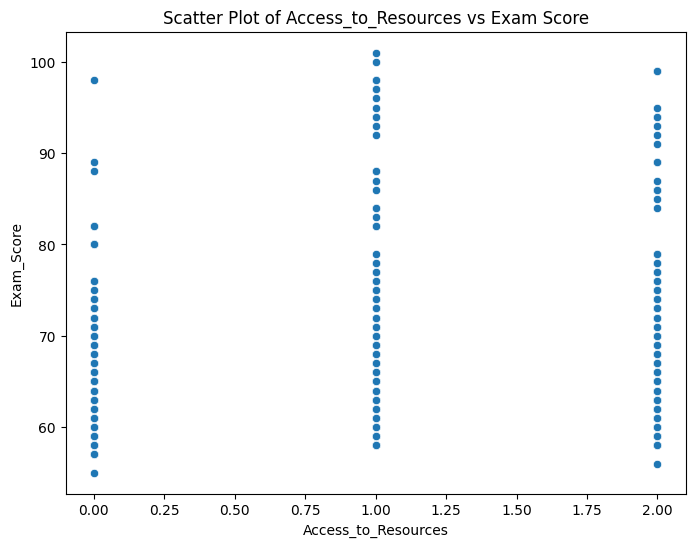

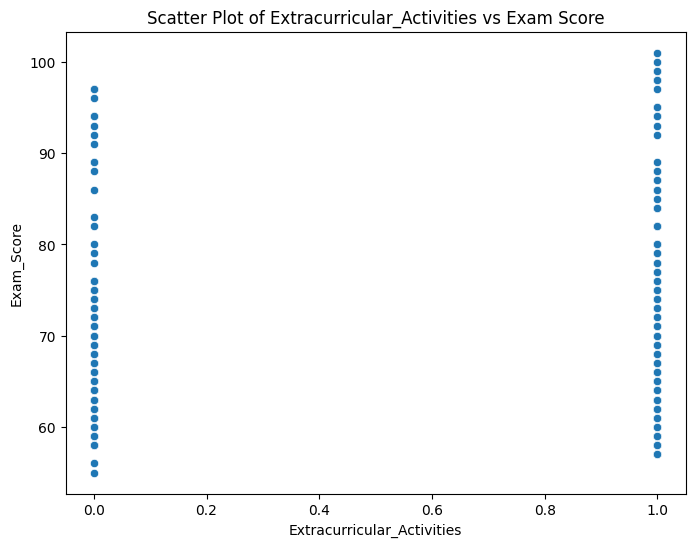

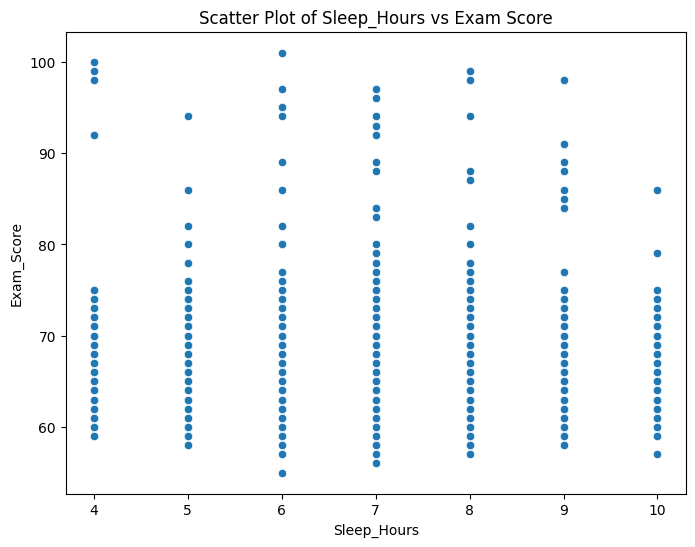

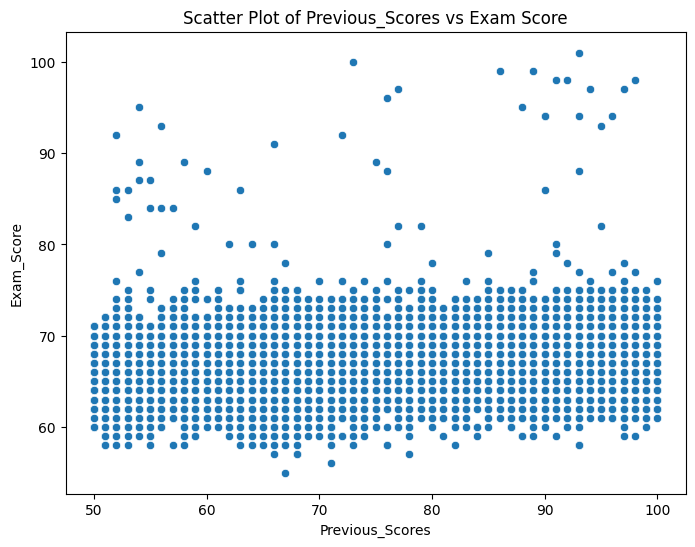

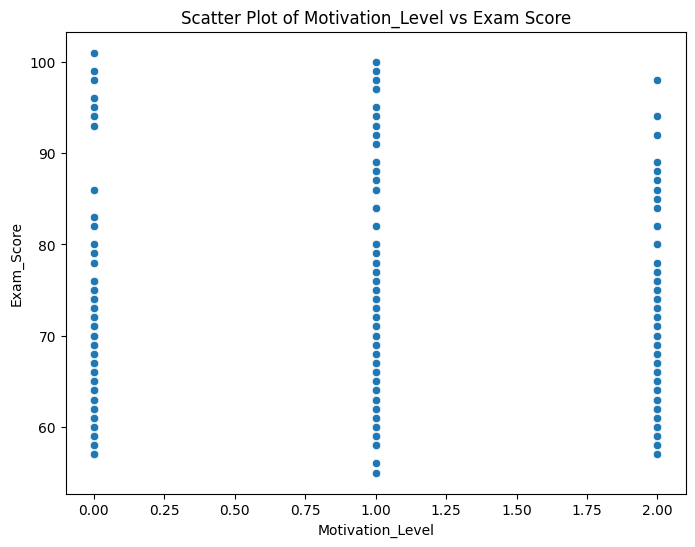

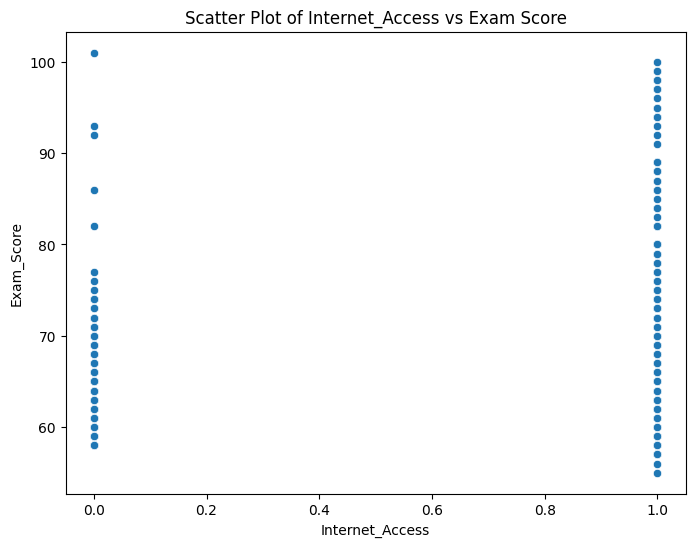

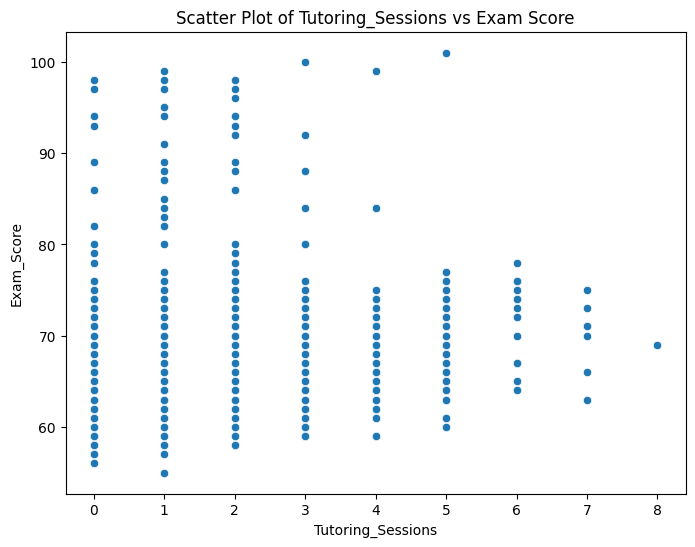

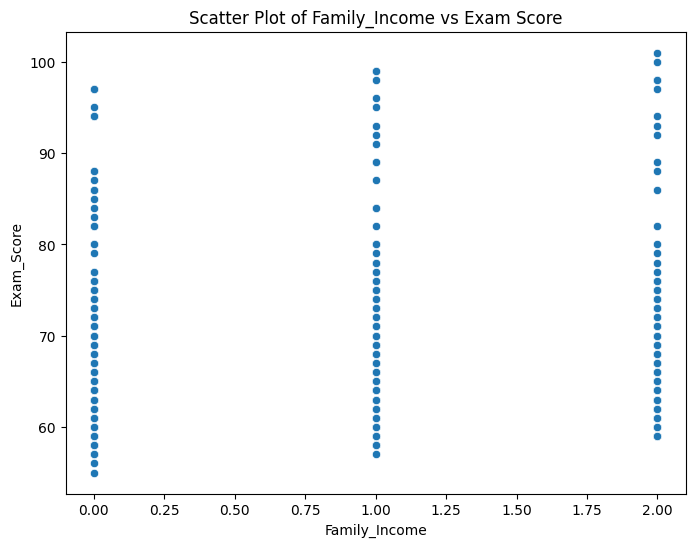

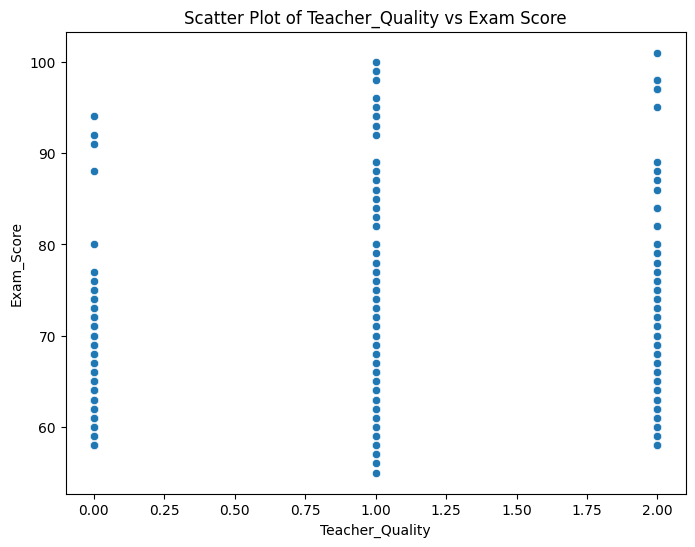

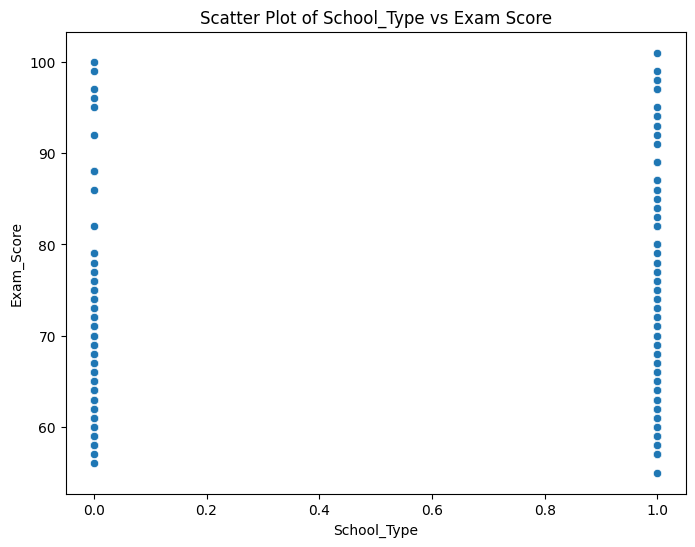

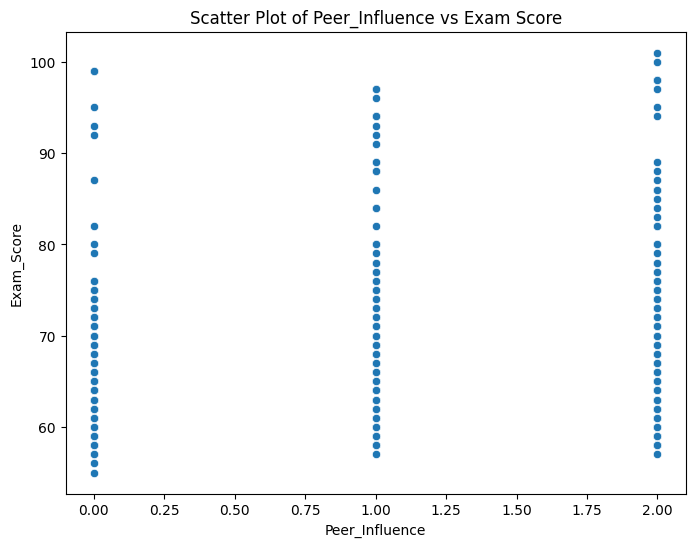

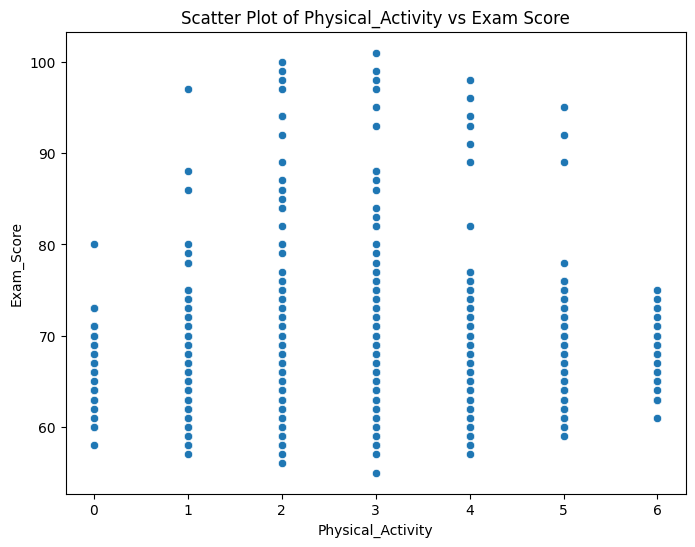

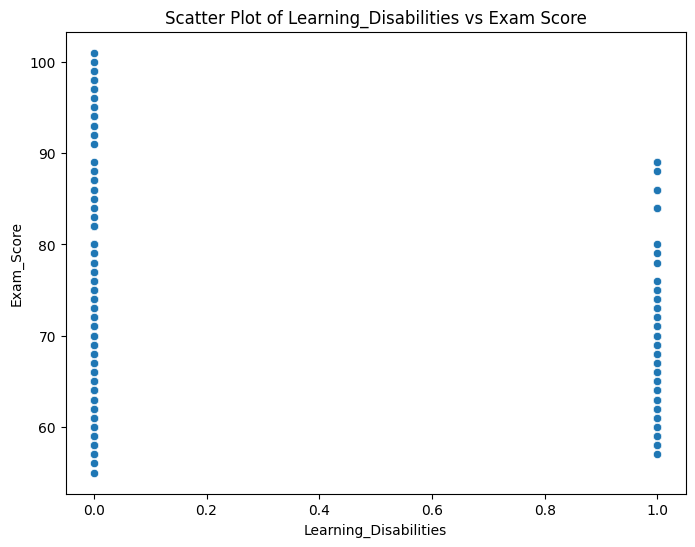

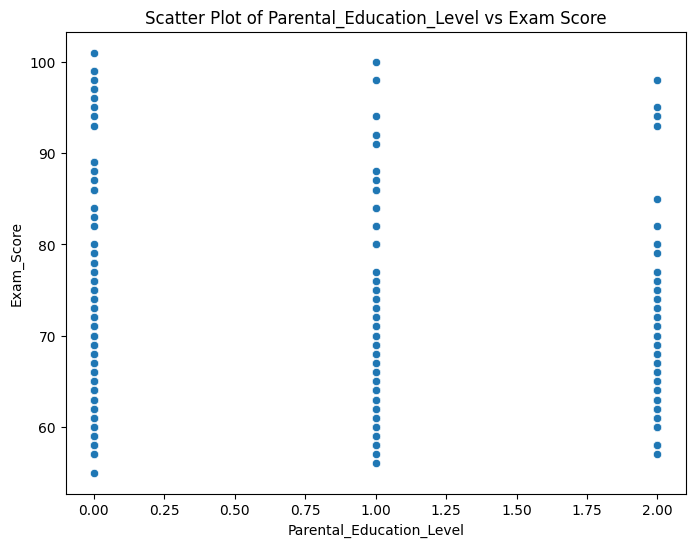

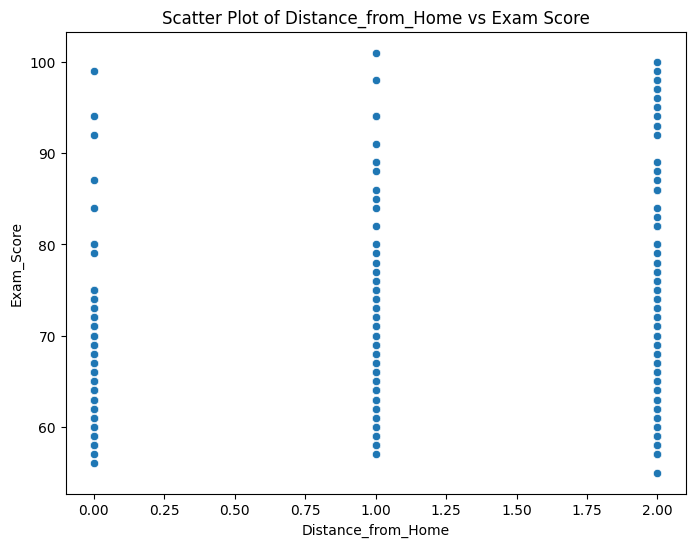

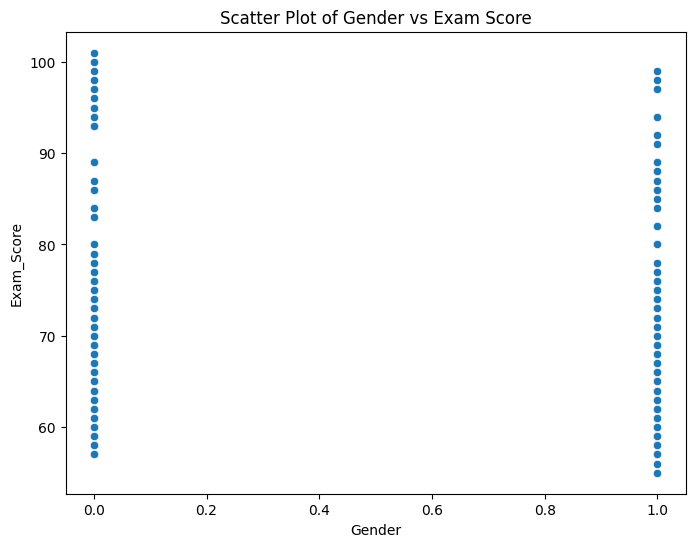

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify the numerical columns in the df_dropped DataFrame
numerical= df.select_dtypes(include=np.number).columns

# Ensure 'Exam_Score' is in the list of numerical columns and is excluded as a feature for plotting against itself
feature_cols = numerical.drop('Exam_Score', errors='ignore')

print("Scatter Plots of Numerical Features vs Exam Score:")

# Create a scatter plot for each numerical feature against 'Exam_Score'
for col in feature_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Exam_Score')
    plt.title(f'Scatter Plot of {col} vs Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.show()

Histograms of Numerical Columns:


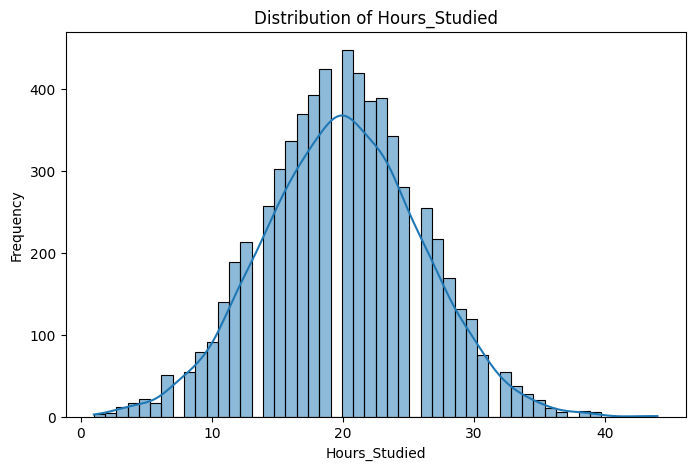

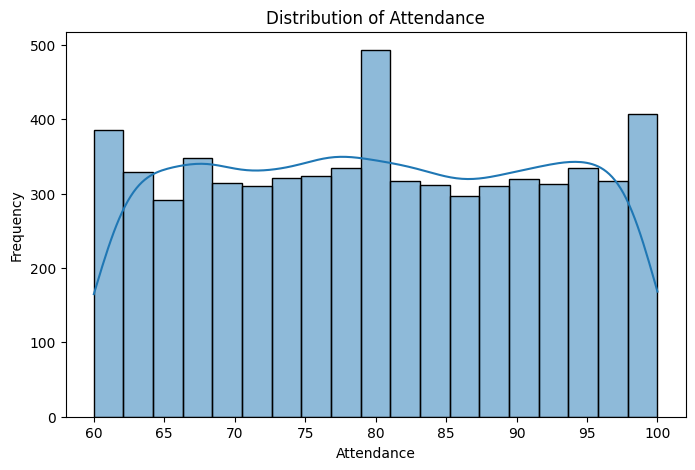

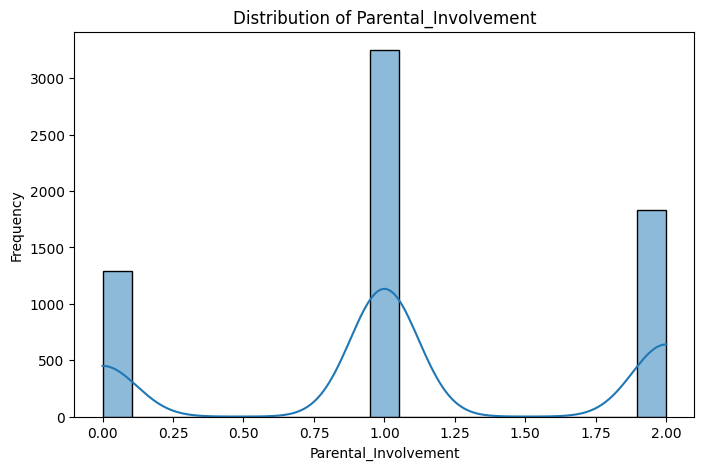

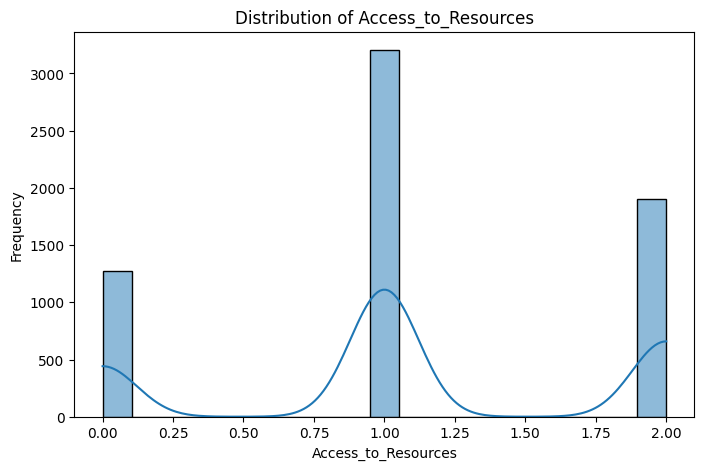

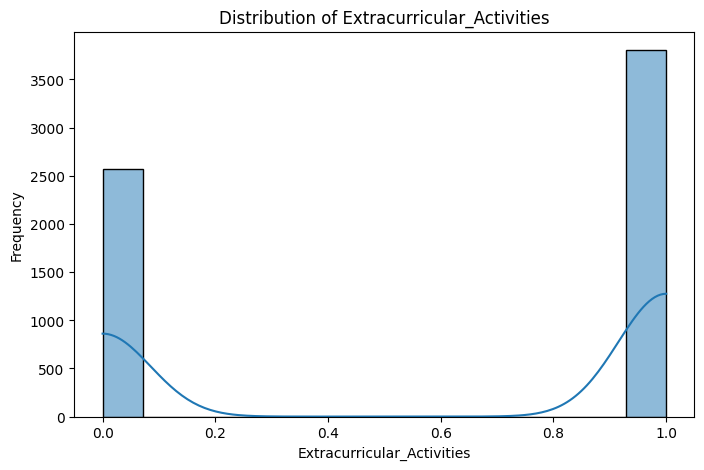

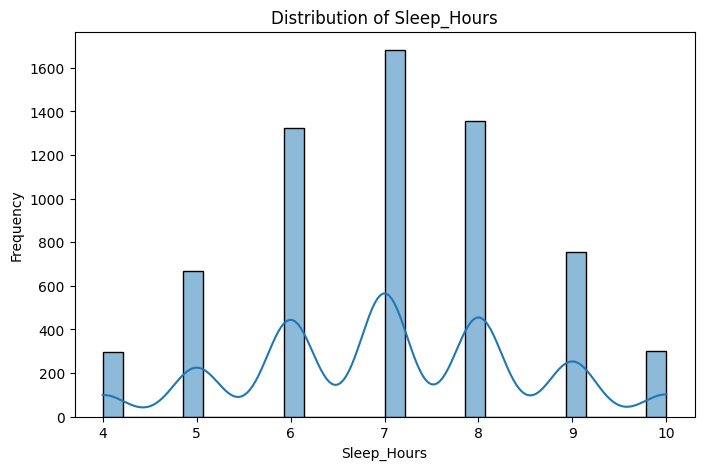

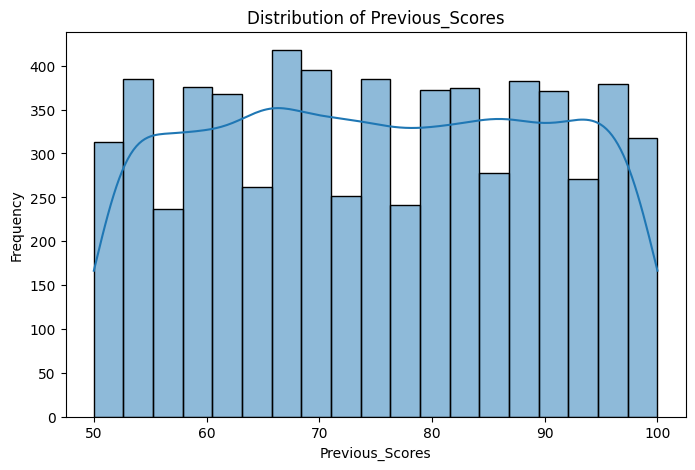

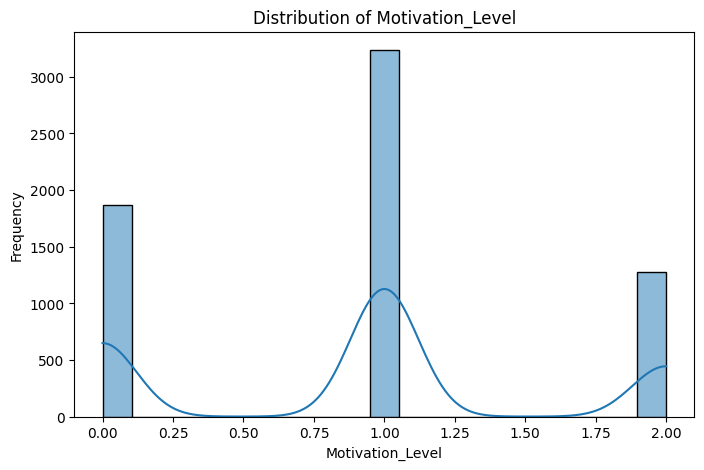

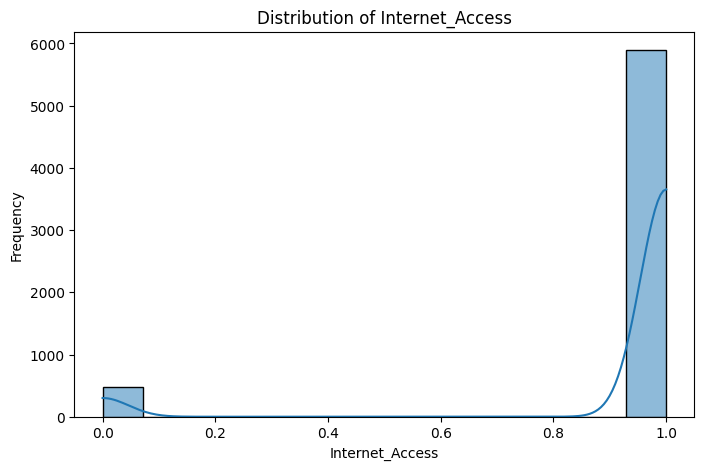

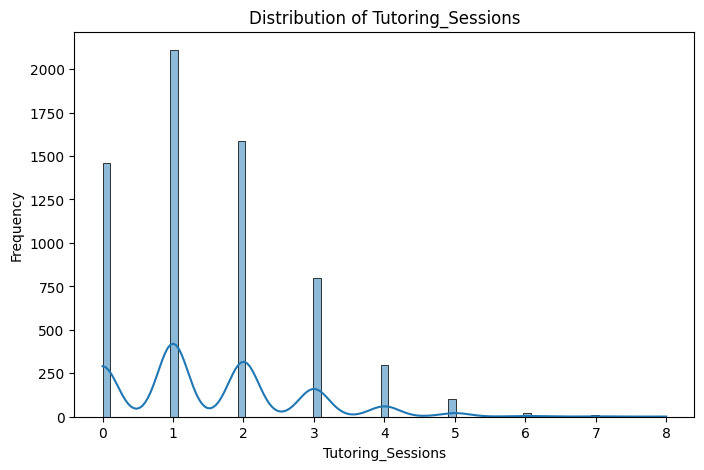

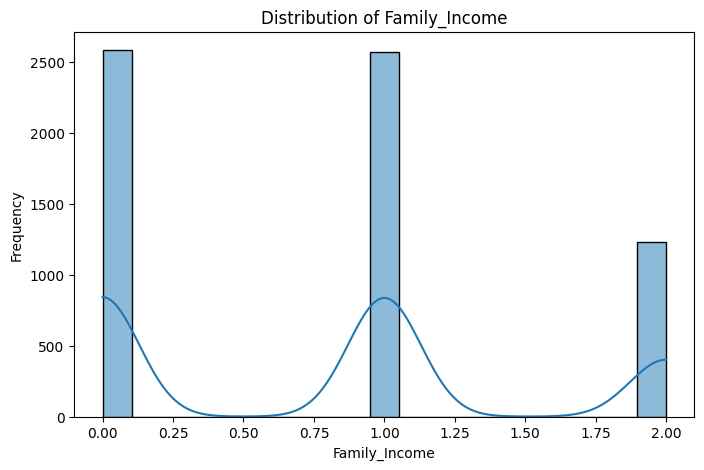

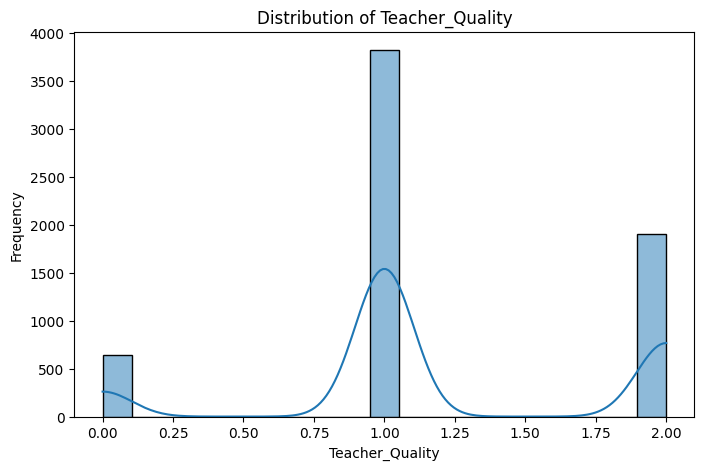

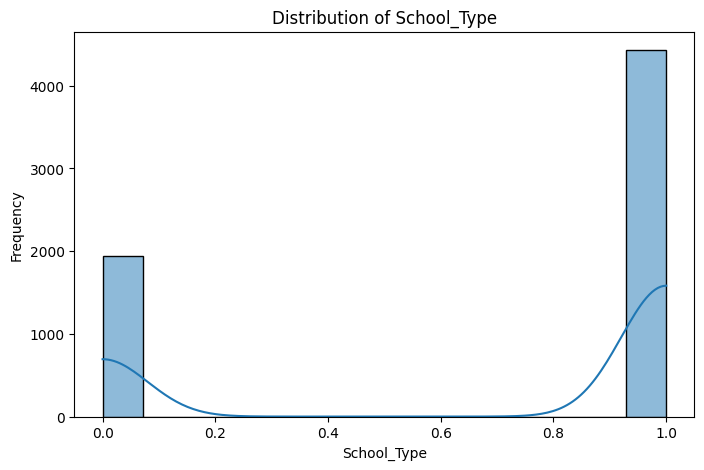

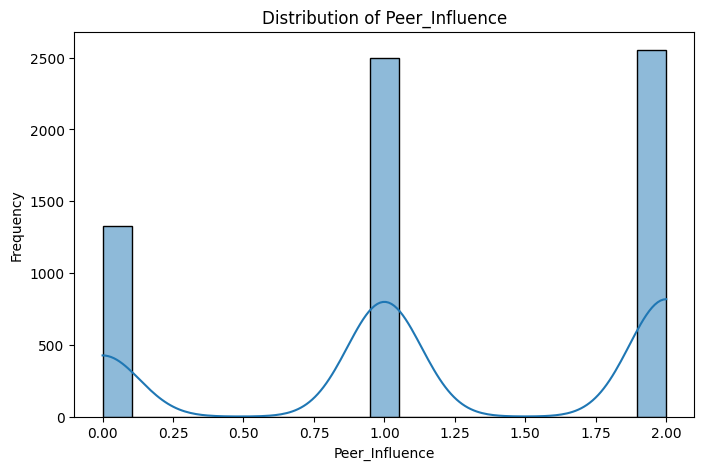

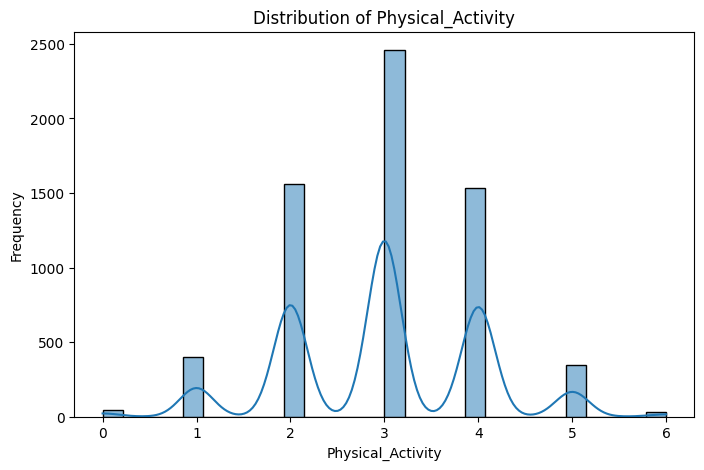

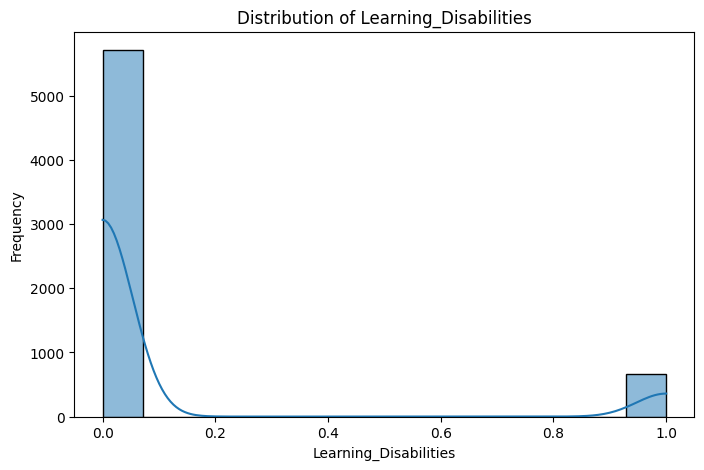

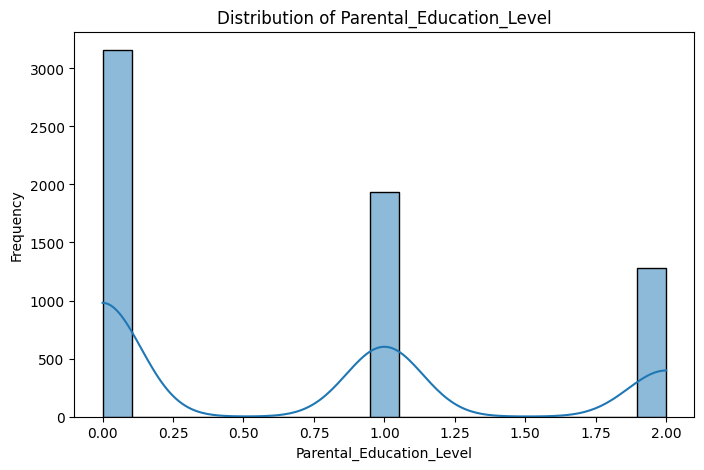

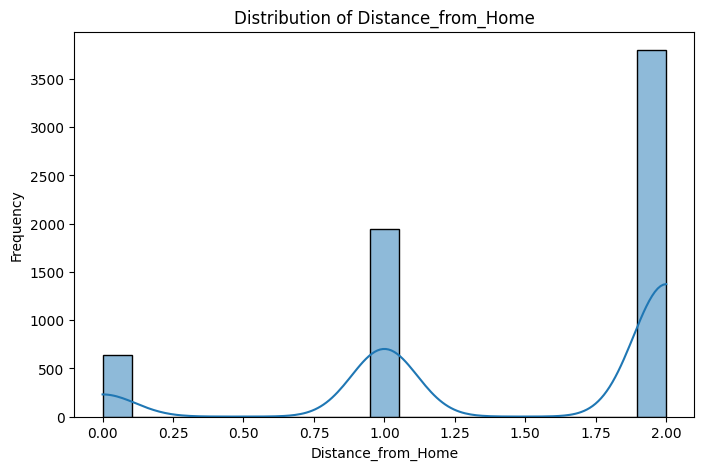

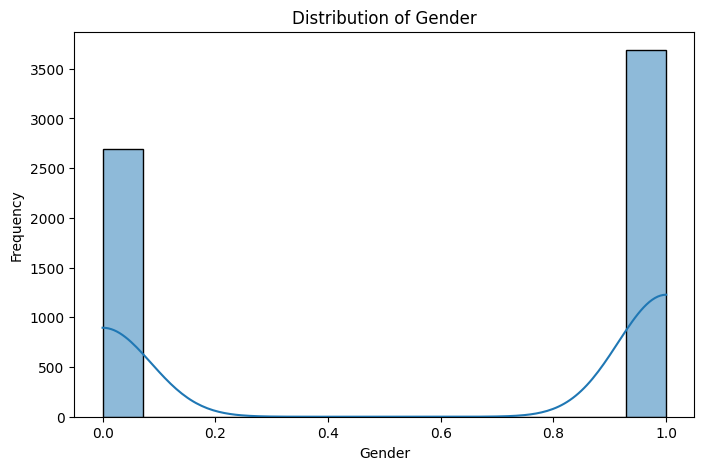

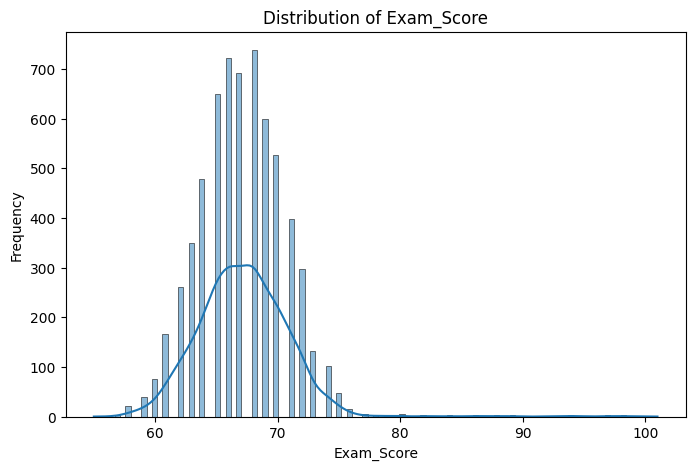

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for numerical columns
print("Histograms of Numerical Columns:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plots between numerical features would be a good next step.
# We can create scatter plots for specific pairs of features or a pair plot
# to visualize relationships between all pairs of numerical features.

## Drop the data that doesnt affect the student score

Correlation with Exam_Score:


,Exam_Score
Exam_Score,1.000000
Attendance,0.580259
Hours_Studied,0.445104
Previous_Scores,0.174283
Access_to_Resources,0.167856
Tutoring_Sessions,0.156829
Parental_Involvement,0.156014
Parental_Education_Level,0.105253
Peer_Influence,0.099133
Family_Income,0.094555


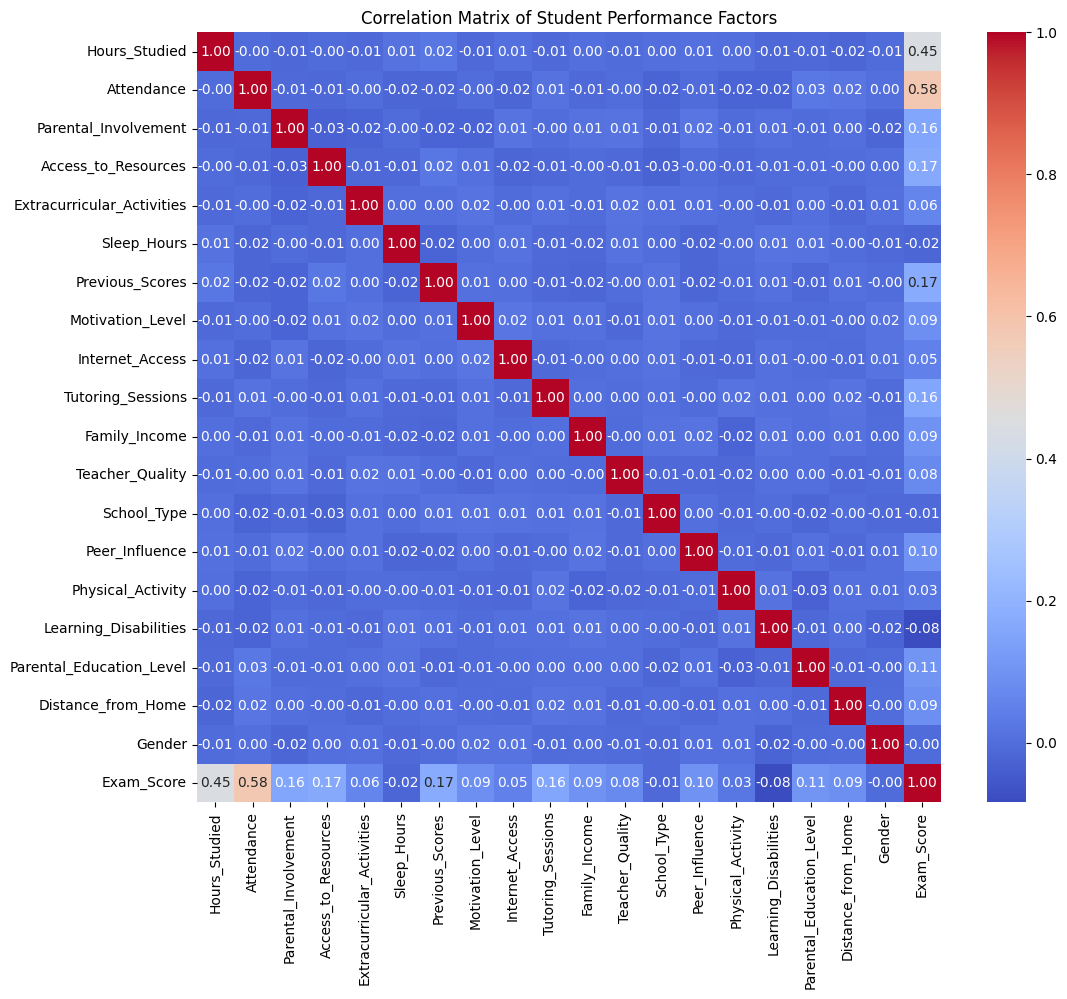

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation with 'Exam_Score'
exam_score_correlation = correlation_matrix['Exam_Score'].sort_values(ascending=False)

# Display the correlation with 'Exam_Score'
print("Correlation with Exam_Score:")
display(exam_score_correlation)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Student Performance Factors')
plt.show()

In [9]:
# Define the correlation threshold
correlation_threshold = 0.05

# Get the absolute correlation with 'Exam_Score'
abs_exam_score_correlation = correlation_matrix['Exam_Score'].abs().sort_values(ascending=False)

# Identify columns to drop based on the threshold (excluding 'Exam_Score' itself)
columns_to_drop = abs_exam_score_correlation[abs_exam_score_correlation < correlation_threshold].index.tolist()
if 'Exam_Score' in columns_to_drop:
    columns_to_drop.remove('Exam_Score')


print(f"Columns to drop (absolute correlation < {correlation_threshold}):")
print(columns_to_drop)

# Drop the identified columns from the DataFrame
df_dropped = df.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
display(df_dropped.head())

# Display the shape of the original and updated DataFrames
print("\nOriginal DataFrame shape:", df.shape)
print("Updated DataFrame shape:", df_dropped.shape)

Columns to drop (absolute correlation < 0.05):
['Physical_Activity', 'Sleep_Hours', 'School_Type', 'Gender']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,0,2,0,73,0,1,0,0,1,2,0,0,2,67
1,19,64,0,1,0,59,0,1,2,1,1,0,0,1,1,61
2,24,98,1,1,1,91,1,1,2,1,1,1,0,2,2,74
3,29,89,0,1,1,98,1,1,1,1,1,0,0,0,1,71
4,19,92,1,1,1,65,1,1,3,1,2,1,0,1,2,70



Original DataFrame shape: (6378, 20)
Updated DataFrame shape: (6378, 16)


# normalization & standardization
tried to do robust scaler too reduce the outlaier but that didnt matter after all ... sad -_- but what is done is done right ?

In [10]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import numpy as np

# Identify numerical columns in the cleaned DataFrame
numerical_cols_cleaned = df_dropped.select_dtypes(include=np.number).columns

# Separate the target variable ('Exam_Score') from the features
features = df_dropped[numerical_cols_cleaned].drop('Exam_Score', axis=1)
target = df_dropped['Exam_Score']

# --- Normalization (Min-Max Scaling) ---
# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max Scaling to the numerical features
features_normalized = min_max_scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame
features_normalized_df = pd.DataFrame(features_normalized, columns=features.columns, index=features.index)

print("Features after Min-Max Normalization:")
display(features_normalized_df.head())

# --- Robust Scaling ---
# Initialize RobustScaler
robust_scaler = RobustScaler()

# Apply Robust Scaling to the normalized features
features_scaled = robust_scaler.fit_transform(features_normalized_df)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features_normalized_df.columns, index=features_normalized_df.index)

print("\nFeatures after Robust Scaling:")
display(features_scaled_df.head())

# You can now use features_scaled_df and target for model training

Features after Min-Max Normalization:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
0,0.511628,0.600,0.0,1.0,0.0,0.46,0.0,1.0,0.000,0.0,0.5,1.0,0.0,0.0,1.0
1,0.418605,0.100,0.0,0.5,0.0,0.18,0.0,1.0,0.250,0.5,0.5,0.0,0.0,0.5,0.5
2,0.534884,0.950,0.5,0.5,1.0,0.82,0.5,1.0,0.250,0.5,0.5,0.5,0.0,1.0,1.0
3,0.651163,0.725,0.0,0.5,1.0,0.96,0.5,1.0,0.125,0.5,0.5,0.0,0.0,0.0,0.5
4,0.418605,0.800,0.5,0.5,1.0,0.30,0.5,1.0,0.375,0.5,1.0,0.5,0.0,0.5,1.0



Features after Robust Scaling:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
0,0.375,0.20,-1.0,1.0,-1.0,-0.08,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,0.0
1,-0.125,-0.80,-1.0,0.0,-1.0,-0.64,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0
2,0.500,0.90,0.0,0.0,0.0,0.64,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.125,0.45,-1.0,0.0,0.0,0.92,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0
4,-0.125,0.60,0.0,0.0,0.0,-0.40,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


Comparison of Data Distribution Before and After Robust Scaling (5 columns):


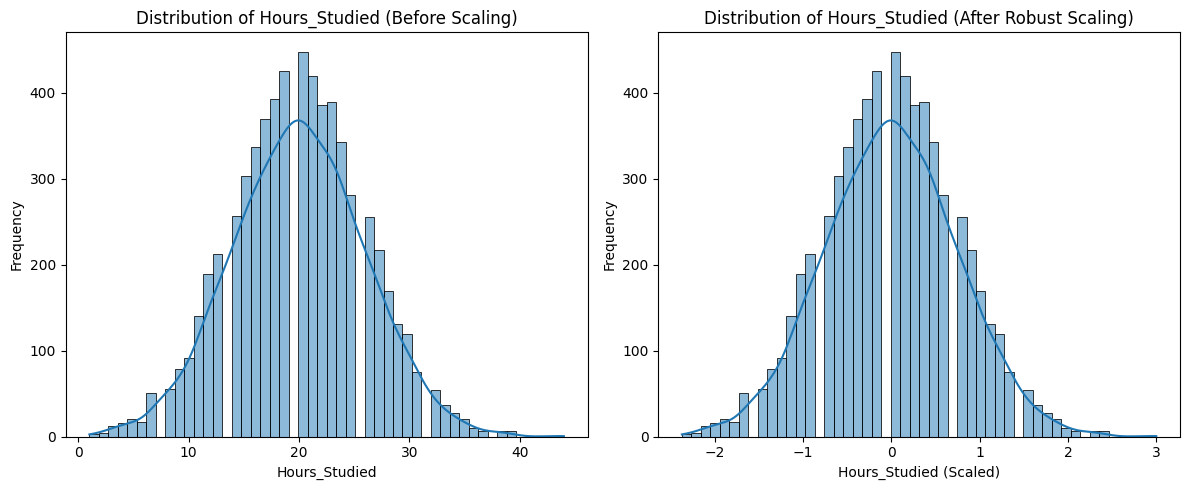

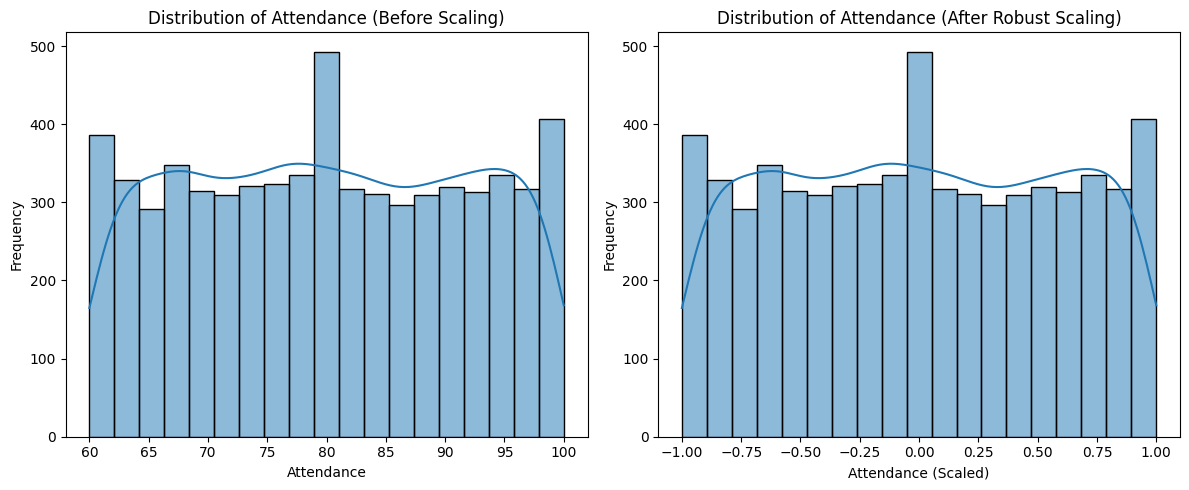

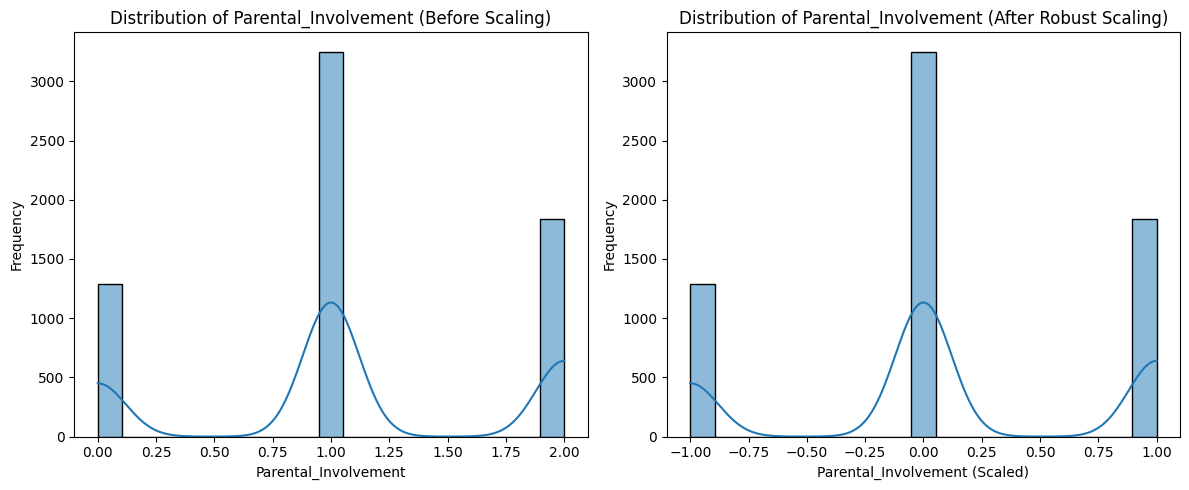

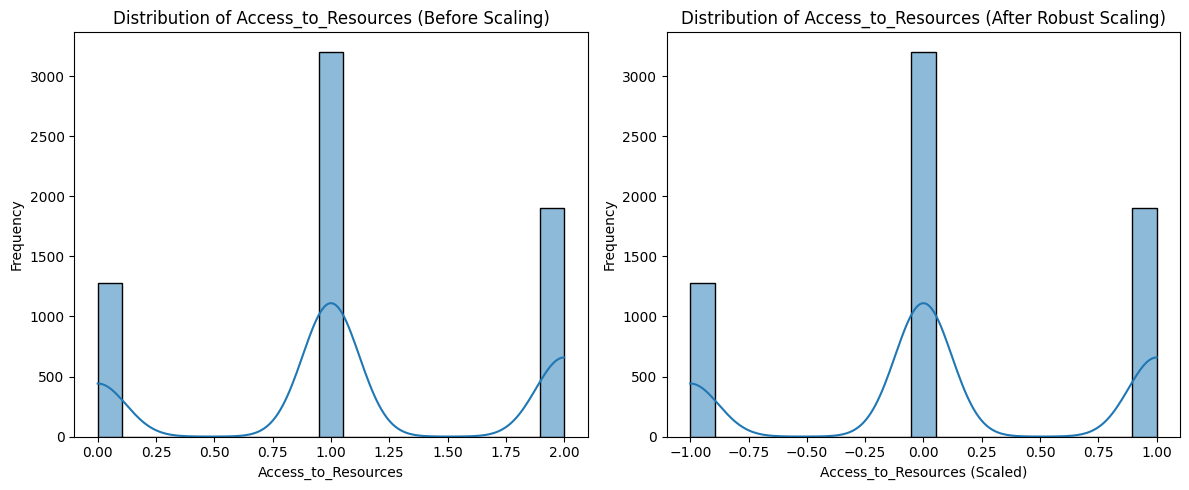

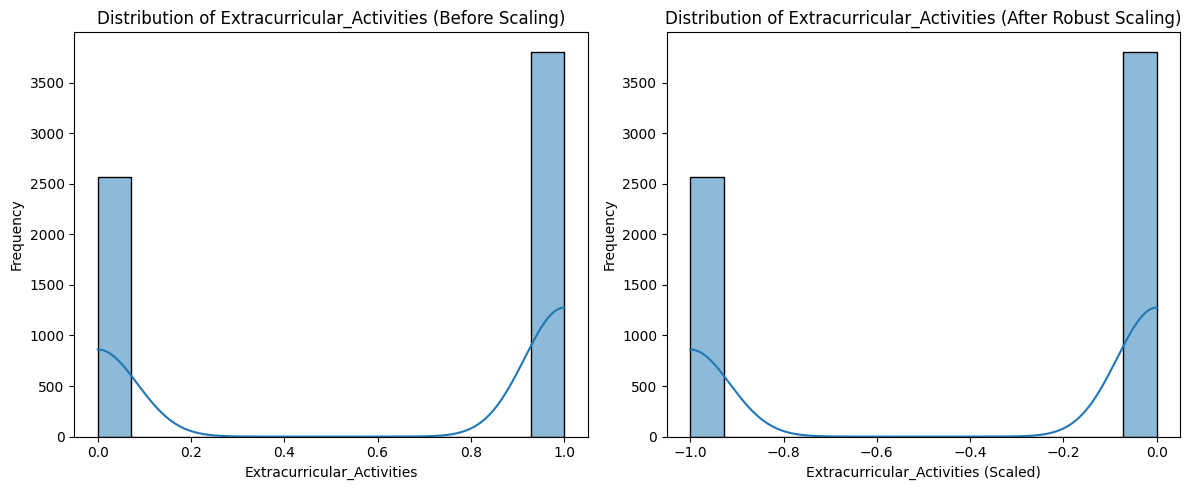

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select 5 numerical columns for comparison
numerical_cols_for_comparison = numerical_cols_cleaned[:5]

print("Comparison of Data Distribution Before and After Robust Scaling (5 columns):")

for col in numerical_cols_for_comparison:
    plt.figure(figsize=(12, 5))

    # Plot histogram before scaling
    plt.subplot(1, 2, 1)
    sns.histplot(df_dropped[col], kde=True) # Changed from df_cleaned to df_dropped
    plt.title(f'Distribution of {col} (Before Scaling)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot histogram after scaling
    plt.subplot(1, 2, 2)
    sns.histplot(features_scaled_df[col], kde=True)
    plt.title(f'Distribution of {col} (After Robust Scaling)')
    plt.xlabel(f'{col} (Scaled)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

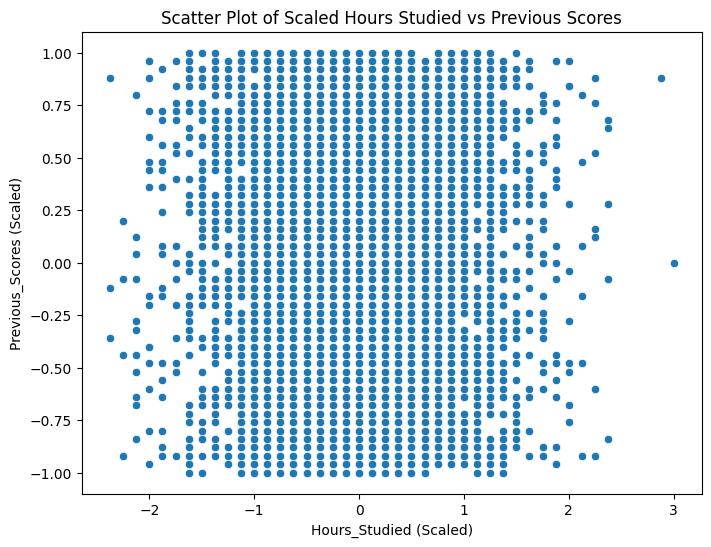

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of 'Hours_Studied' vs 'Previous_Scores' from the scaled features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features_scaled_df, x='Hours_Studied', y='Previous_Scores')
plt.title('Scatter Plot of Scaled Hours Studied vs Previous Scores')
plt.xlabel('Hours_Studied (Scaled)')
plt.ylabel('Previous_Scores (Scaled)')
plt.show()

In [18]:
import numpy as np

# Store the shape of the DataFrame before removing outliers
original_shape = df_dropped.shape
print("Shape of DataFrame before outlier removal:", original_shape)

# Identify numerical columns in the DataFrame after dropping low-correlation columns
numerical_cols_dropped = df_dropped.select_dtypes(include=np.number).columns

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = df_dropped[numerical_cols_dropped].quantile(0.25)
Q3 = df_dropped[numerical_cols_dropped].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# A data point is an outlier if it is below the lower bound or above the upper bound
outliers = df_dropped[~((df_dropped[numerical_cols_dropped] >= lower_bound) & (df_dropped[numerical_cols_dropped] <= upper_bound)).all(axis=1)]

print("\nNumber of outliers identified:", len(outliers))

# Remove outliers from the DataFrame
df_cleaned = df_dropped[((df_dropped[numerical_cols_dropped] >= lower_bound) & (df_dropped[numerical_cols_dropped] <= upper_bound)).all(axis=1)]

# Store the shape of the DataFrame after removing outliers
cleaned_shape = df_cleaned.shape
print("Shape of DataFrame after outlier removal:", cleaned_shape)

# Display the first few rows of the cleaned DataFrame
display(df_cleaned.head())

Shape of DataFrame before outlier removal: (6378, 16)

Number of outliers identified: 1541
Shape of DataFrame after outlier removal: (4837, 16)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
0,23,84,0,2,0,73,0,1,0,0,1,2,0,0,2,67
1,19,64,0,1,0,59,0,1,2,1,1,0,0,1,1,61
2,24,98,1,1,1,91,1,1,2,1,1,1,0,2,2,74
3,29,89,0,1,1,98,1,1,1,1,1,0,0,0,1,71
4,19,92,1,1,1,65,1,1,3,1,2,1,0,1,2,70


# splitting the data

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using df_cleaned (data after outlier removal, before scaling)
X = df_cleaned.drop('Exam_Score', axis=1)
y = df_cleaned['Exam_Score']

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Using random_state for reproducibility

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3385, 15)
Shape of X_test: (1452, 15)
Shape of y_train: (3385,)
Shape of y_test: (1452,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for square root

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Display the model's coefficients and intercept
print("\nModel Coefficients:")
for col, coef in zip(X_train.columns, model.coef_):
    print(f"{col}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared (R2) Score: 0.98

Model Coefficients:
Hours_Studied: 0.2974
Attendance: 0.1995
Parental_Involvement: 0.9946
Access_to_Resources: 0.9993
Extracurricular_Activities: 0.5037
Previous_Scores: 0.0498
Motivation_Level: 0.4952
Internet_Access: -0.0000
Tutoring_Sessions: 0.4972
Family_Income: 0.4832
Teacher_Quality: 0.4899
Peer_Influence: 0.4911
Learning_Disabilities: -0.0000
Parental_Education_Level: 0.4927
Distance_from_Home: 0.5283
Intercept: 35.2451


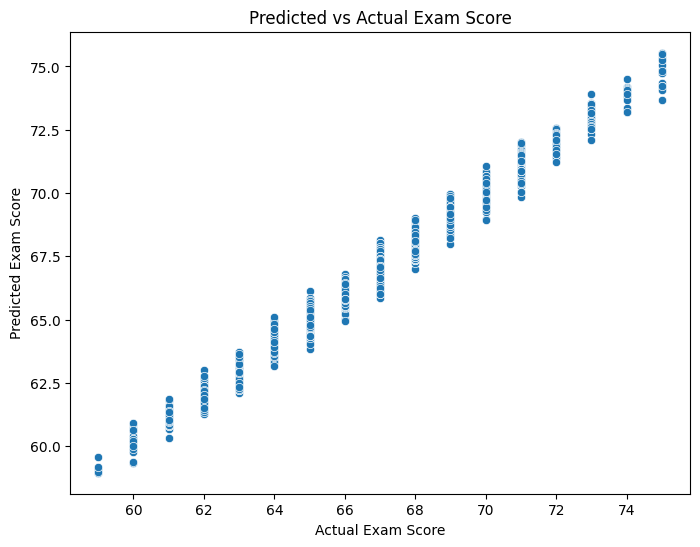

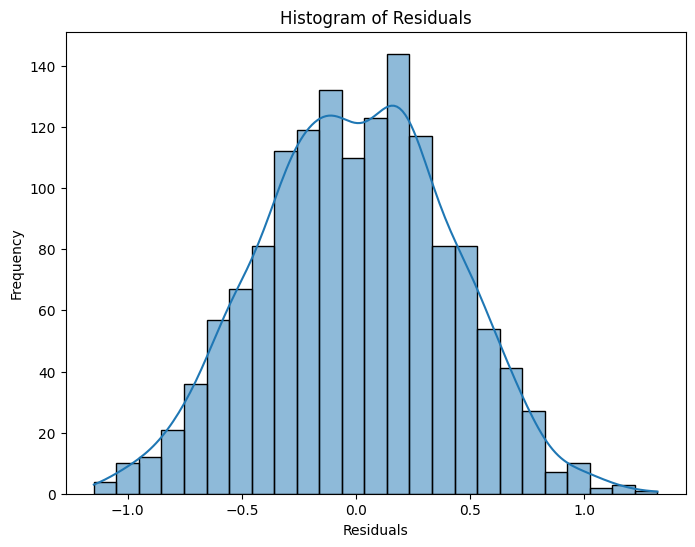

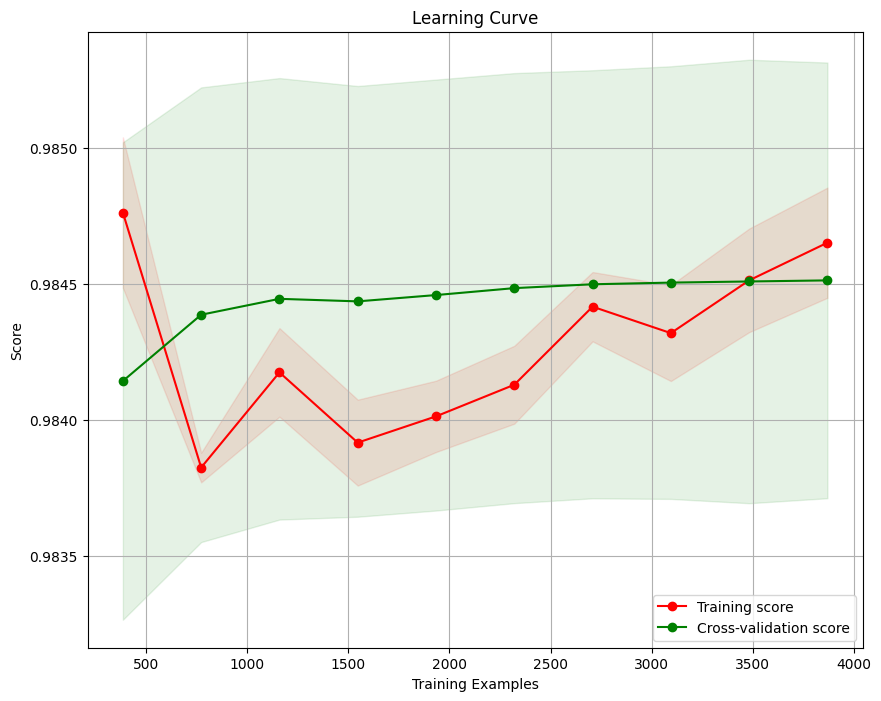

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np

# 1. Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs Actual Exam Score")
plt.show()

# 2. Histogram of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score") # Corrected test_sizes to train_sizes

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the degree of the polynomial features
degree = 2

# Initialize PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=degree)

# Create polynomial features for the training and testing data
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

print(f"Shape of training data after polynomial transformation (degree={degree}):", X_train_poly.shape)
print(f"Shape of testing data after polynomial transformation (degree={degree}):", X_test_poly.shape)

# Initialize the Linear Regression model
model_poly = LinearRegression()

# Train the Polynomial Regression model
model_poly.fit(X_train_poly, y_train)

# Make predictions on the polynomial testing data
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the Polynomial Regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"R-squared (R2) Score: {r2_poly:.2f}")



Shape of training data after polynomial transformation (degree=2): (3385, 136)
Shape of testing data after polynomial transformation (degree=2): (1452, 136)

Polynomial Regression Model Evaluation:
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.42
R-squared (R2) Score: 0.98


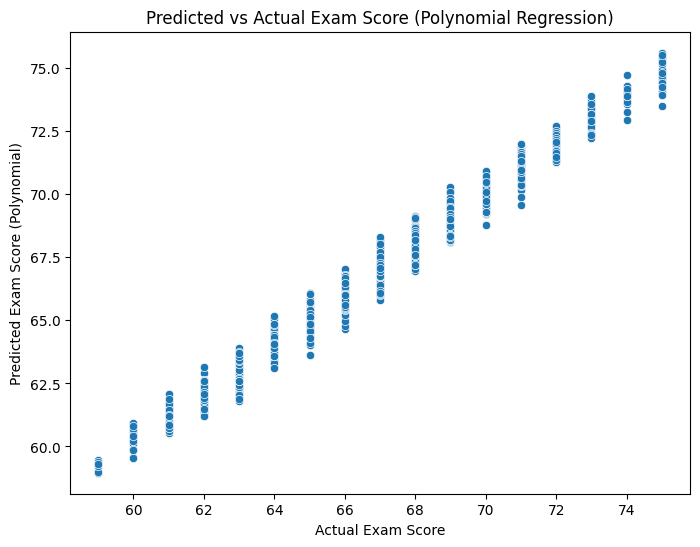

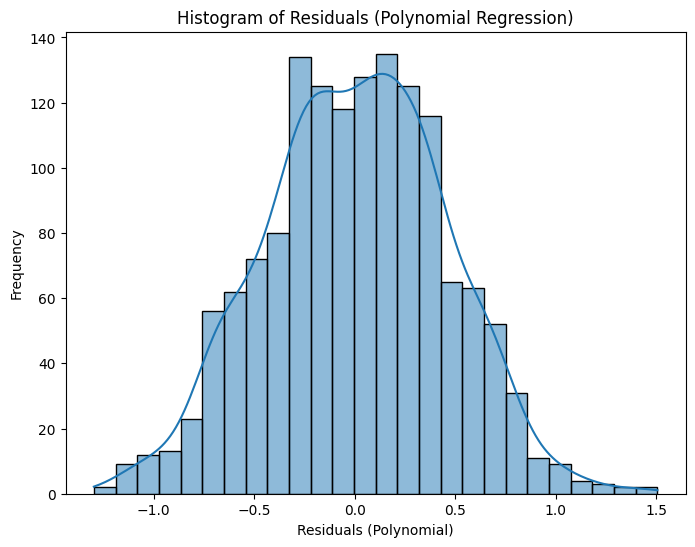

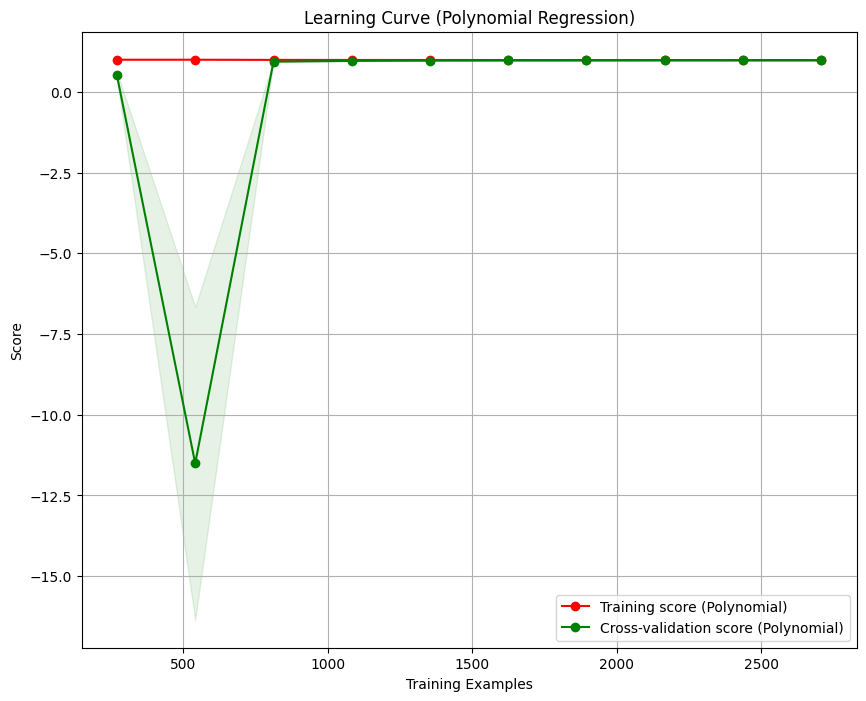

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np

# Evaluate the Polynomial Regression model (degree 2)

# 1. Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score (Polynomial)")
plt.title("Predicted vs Actual Exam Score (Polynomial Regression)")
plt.show()

# 2. Histogram of Residuals
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
sns.histplot(residuals_poly, kde=True)
plt.xlabel("Residuals (Polynomial)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Polynomial Regression)")
plt.show()

# 3. Learning Curve
# Note: Learning curve for polynomial regression can be computationally intensive due to the number of features
# We will use the polynomial features (X_train_poly, X_test_poly) and the polynomial model (model_poly)

train_sizes_poly, train_scores_poly, test_scores_poly = learning_curve(
    model_poly, X_train_poly, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean_poly = np.mean(train_scores_poly, axis=1)
train_scores_std_poly = np.std(train_scores_poly, axis=1)
test_scores_mean_poly = np.mean(test_scores_poly, axis=1)
test_scores_std_poly = np.std(test_scores_poly, axis=1)

plt.figure(figsize=(10, 8))
plt.fill_between(
    train_sizes_poly,
    train_scores_mean_poly - train_scores_std_poly,
    train_scores_mean_poly + train_scores_std_poly,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes_poly,
    test_scores_mean_poly - test_scores_std_poly,
    test_scores_mean_poly + test_scores_std_poly,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes_poly, train_scores_mean_poly, "o-", color="r", label="Training score (Polynomial)")
plt.plot(train_sizes_poly, test_scores_mean_poly, "o-", color="g", label="Cross-validation score (Polynomial)")

plt.title("Learning Curve (Polynomial Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()